### While online shopping continues to grow, brick-and-mortar malls in the USA still see significant foot traffic, especially on weekends and holidays. Here's a quick look at some key trends:

## Who visits malls?

### Families: Often seeking entertainment and dining options alongside shopping.
### Young adults: Drawn to social aspects, trendy stores, and specific events.
### Seniors: Appreciate convenience, accessibility, and community atmosphere.

## What are they buying?

### Apparel: Still a major draw, but the focus often shifts towards experiences and services.
### Specialty stores: Offering unique items, personalized experiences, or niche products.
### Food and entertainment: From quick bites to sit-down restaurants, arcades, and movie theaters.

### The following dataset comes from a mall in California in 2021. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [11]:
df = pd.read_csv(r"D:\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Explore the Data

In [12]:
df.shape

(200, 5)

In [13]:
df.drop(['CustomerID'],axis = 1, inplace = True)

In [14]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.info()
# We see no null values in dataframe, will need to encode gender column later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
df.isnull().sum() # Other way to check if there are missing values.

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
Gender = {'Male': 1,'Female': 0}

df.Gender = [Gender[item] for item in df.Gender]
print(df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         1   19                  15                      39
1         1   21                  15                      81
2         0   20                  16                       6
3         0   23                  16                      77
4         0   31                  17                      40
..      ...  ...                 ...                     ...
195       0   35                 120                      79
196       0   45                 126                      28
197       1   32                 126                      74
198       1   32                 137                      18
199       1   30                 137                      83

[200 rows x 4 columns]


In [16]:
df['Gender']=df['Gender'].replace(Gender)

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Utilize graphs to achieve a deeper insight

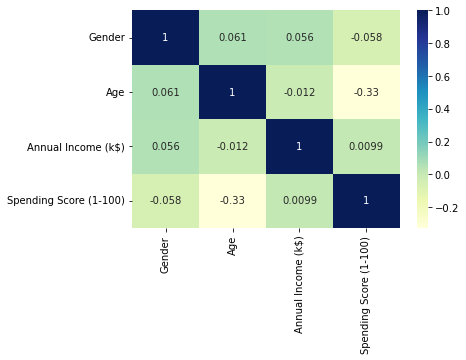

In [18]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### No strong coorelations seen in this heatmap.

<AxesSubplot:ylabel='Frequency'>

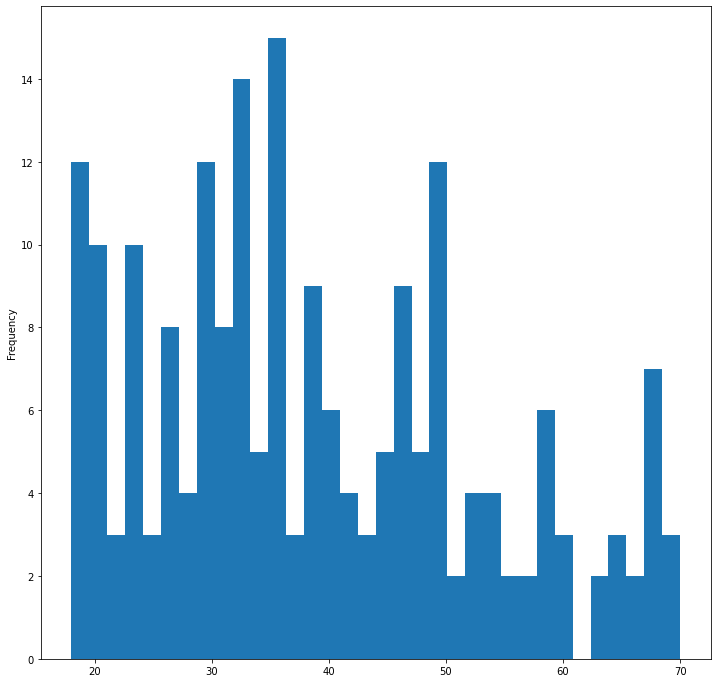

In [19]:
#Histogram
df.Age.plot(kind = 'hist',bins = 34,figsize = (12,12))

### This graph shows there are more younger consumers than elderly consumers.

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

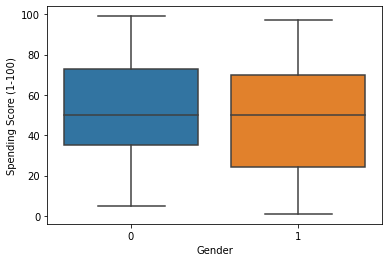

In [21]:
sns.boxplot(data=df, x="Gender", y="Spending Score (1-100)")

### Gender with value 1 = Male. There is little difference between the genders on money spent.

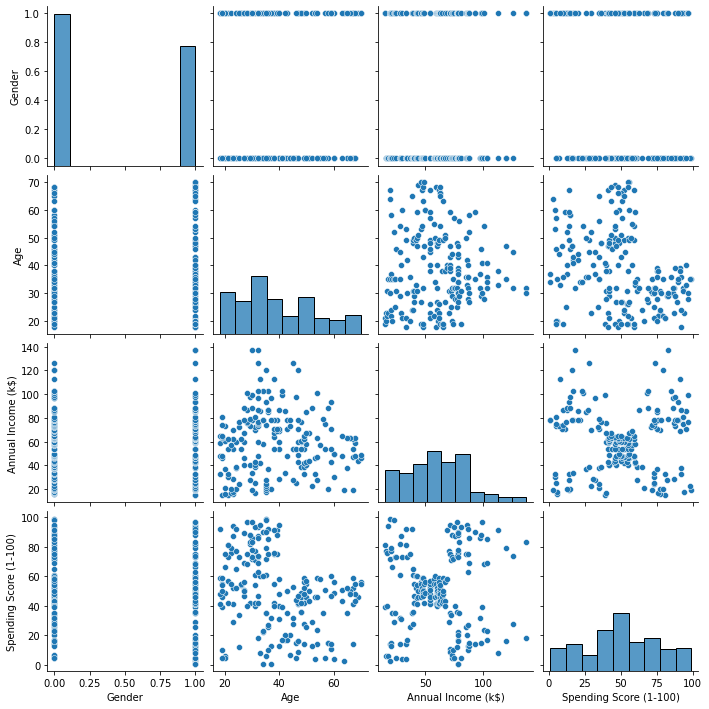

In [22]:
sns.pairplot(df)

In [24]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### K-Means Clustering

In [25]:
# Getting ready to use Kmeans

inertia_list = []

for i in range(2, 10):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df.iloc[:,2:])
    inertia_list.append(kmean.inertia_)

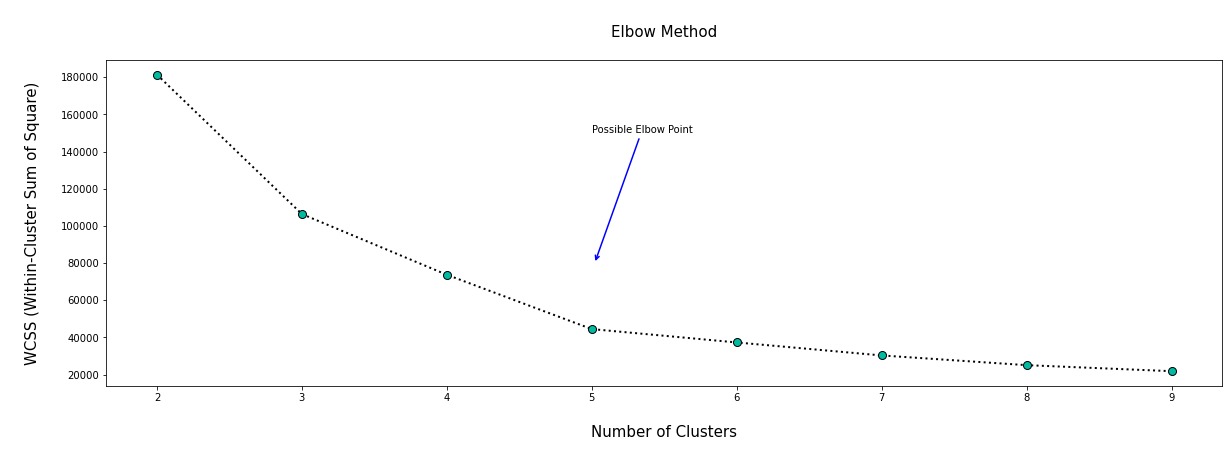

In [26]:
# Using the elbow method
plt.figure(figsize=(20, 6))
plt.plot(range(2, 10), inertia_list, linestyle=':', linewidth=2, marker="o", markerfacecolor="#00BBA2", markersize=8, c="black")

plt.annotate('Possible Elbow Point', xy=(5.02, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=1.5))

plt.xlabel("\nNumber of Clusters\n", fontsize=15)
plt.ylabel("\nWCSS (Within-Cluster Sum of Square)\n", fontsize=15)
plt.title("\nElbow Method\n", fontsize=15)
plt.show()

#### If the number of clusters is equal to 5, you can see the "elbow" on the graph. That is the value we should use.

In [27]:
# find the Silhouette Score 
for i in range(2, 10):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df.iloc[:,2:])

    print(f"Cluster {i} silhouette score : {round(silhouette_score(df.iloc[:,2:], kmean.labels_), 2)}")

Cluster 2 silhouette score : 0.3
Cluster 3 silhouette score : 0.47
Cluster 4 silhouette score : 0.49
Cluster 5 silhouette score : 0.55
Cluster 6 silhouette score : 0.54
Cluster 7 silhouette score : 0.53
Cluster 8 silhouette score : 0.46
Cluster 9 silhouette score : 0.46


### We confirm cluster 5 silhouette score as best.

In [32]:
# use Kmeans
kmean = KMeans(n_clusters=5)
kmean.fit(df.iloc[:,1:])

KMeans(n_clusters=5)

In [33]:
centroids = kmean.cluster_centers_
centroids

array([[32.69230769, 86.53846154, 82.12820513],
       [43.72727273, 55.48051948, 49.32467532],
       [40.66666667, 87.75      , 17.58333333],
       [24.96      , 28.04      , 77.        ],
       [45.2173913 , 26.30434783, 20.91304348]])

In [34]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [38]:
# Make 3-D scatter plot to show results
fig = go.Figure()
fig = px.scatter_3d(df, x=df['Age'], y=df['Annual Income (k$)'], z=df['Spending Score (1-100)'], 
                    color=kmean.labels_, opacity=0.7, height=600)
fig.add_trace(go.Scatter3d(x=centroids[:,0], y=centroids[:,1], z=centroids[:,2],  text="Centroid", 
                           mode='markers', marker=dict(size=12, color='black')))
camera = dict(
    eye=dict(x=1.9, y=1.5, z=0.5)
)

fig.update_layout(scene_camera=camera, title="K Mean++ Clustering", title_x=0.5)
fig.show()

In [39]:
analyzed_df = df.iloc[:,1:]                                           
analyzed_df["Cluster"] = kmean.labels_

analyzed_df = analyzed_df.groupby("Cluster")
analyzed_df.mean().round(1)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.7,86.5,82.1
1,43.7,55.5,49.3
2,40.7,87.8,17.6
3,25.0,28.0,77.0
4,45.2,26.3,20.9


## In Conclusion:
### From the analysis we can conclude that;
### Cluster 0 : Consist of Young age people having High Income spends high
### Cluster 1 : Consist of mid age people having Average Income spends moderate
### Cluster 2 : Consist of Mid age people having High Income spends less
### Cluster 3 : Consist of young age people having Low Income spends high
### Cluster 4 : Consist of Mid age people having Low Income spends low